In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

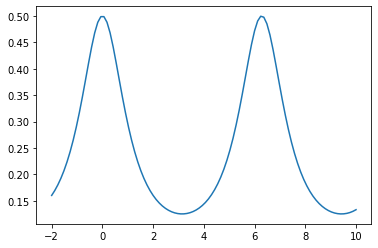

In [45]:
f = lambda x: 1 / (5 - 3 * np.cos(x))
a, b = -2, 10
x = np.linspace(a, b, 100)

plt.plot(x, f(x))
plt.show()

In [46]:
def make_value_table(start, end, count, f):
    """Функция для построения таблицы узлов
    start: левая граница интервала
    end: правая граница интервала
    count: количество узлов
    f: функция
    returns: таблицу узлов"""
    x_table = np.linspace(start, end, count)
    y_table = np.array([f(x) for x in x_table])
    
    result = np.concatenate(([x_table], [y_table]))
    return result

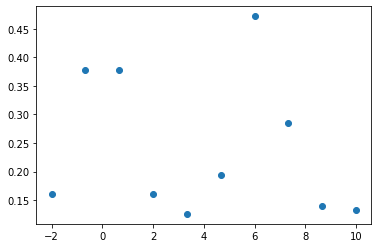

In [47]:
table_count = 10
value_table = make_value_table(a, b, table_count, f)

plt.scatter(value_table[0], value_table[1])
plt.show()

In [48]:
df_table = pd.DataFrame(columns=[f'x{i}' 
                                 for i, _ in enumerate(value_table.T)],
                        index=['x', 'f(x)'], data=value_table)
display(df_table)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
x,-2.00000,-0.666667,0.666667,2.00000,3.333333,4.666667,6.000000,7.333333,8.666667,10.000000
f(x),0.16004,0.378453,0.378453,0.16004,0.125865,0.194662,0.471812,0.285089,0.139307,0.133028


In [49]:
def make_pspline(table, degree):
    """Функция для построения полиномиального сплайна
    table: таблица узлов
    degree: степень многочлена"""
    pot_koef = np.zeros((degree, table.shape[1] - 1))
    matrix = []
    free_values = []
    
    if degree > 1:
        eq = np.array([k * table[0][0] ** (k - 1) for k in range(degree + 1)])
        after = np.array([0 for _ in range((degree + 1) * (table.shape[1] - 2))])
        row = np.concatenate((eq, after))
        matrix.append(row)
        free_values.append(0)
        
    if degree > 2:
        eq = np.array([k * table[0][-1] ** (k - 1) for k in range(degree + 1)])
        row = np.concatenate((after, eq))
        matrix.append(row)
        free_values.append(0)
    
    for i in range(table.shape[1] - 1):
        if i != table.shape[1] - 2:
            if degree > 1:
                eq1 = np.array([k * table[0][i + 1] ** (k - 1) for k in range(degree+1)])
                eq2 = -eq1
                before = np.array([0 for _ in range((degree + 1) * i)])
                after = np.array([0 for _ in range((degree + 1) * (i + 2), (degree + 1) * (table.shape[1] - 1))])
                row = np.concatenate((before, eq1, eq2, after))
                matrix.append(row)
                free_values.append(0)
            if degree > 2:
                eq1 = np.array([k * (k - 1) * table[0][i + 1] ** (k - 2) for k in range(degree+1)])
                eq2 = -eq1
                row = np.concatenate((before, eq1, eq2, after))
                matrix.append(row)
                free_values.append(0)
        for j in range(2):
            eq_1 = np.array([table[0][i + j] ** k for k in range(degree+1)])
            mat_current = np.array([eq_1[i] for i in range(degree+1)])

            before_current = np.array([0 for _ in range((degree + 1) * i)])
            after_current = np.array([0 for _ in range((degree + 1) * (i + 1), 
                                                       (degree + 1) * (table.shape[1] - 1))])

            current_row = np.concatenate((before_current, mat_current, after_current))
            matrix.append(current_row)
            free_values.append(table[1][i + j])
        
    return np.array(matrix), np.array(free_values)

In [50]:
def plot_spline(spline, table, degree, subplots, color='red'):
    """Функция для построение сплайнов
    spline: вектор коэффициентов многочленов сплайнов
    table: таблица узлов интерполяции
    degree: степень многочленов
    subplots: fig, ax для matplotlib
    color: цвет, которым будут окрашены сплайны"""
    fig, ax = subplots
    for i in range(table.shape[1] - 1):
        s = lambda x: np.sum([spline[i * (degree + 1) + k] * (x ** k) 
                              for k in range(degree + 1)])
        x = np.linspace(table[0][i], table[0][i + 1], 50)
        
        if i == 0:
            ax.plot(x, [s(x_) for x_ in x], color=color, label=f'Сплайны {degree} степени')
            ax.legend()
        else:
            ax.plot(x, [s(x_) for x_ in x], color=color)

In [51]:
spline3 = np.linalg.solve(*make_pspline(value_table, 3))

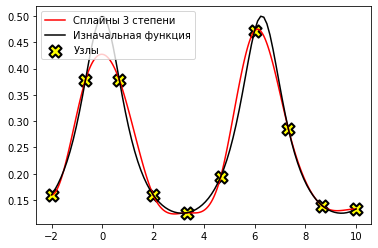

In [52]:
fig, ax = plt.subplots()
plot_spline(spline3, value_table, 3, (fig, ax))
ax.plot(x, f(x), color='black', label='Изначальная функция')
ax.scatter(value_table[0], value_table[1], marker='X', s=150,
           c='yellow', linewidth=2, edgecolor='black', label='Узлы')
ax.legend()
plt.show()